In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
import pickle

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_1.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/unsw-nb15/UNSW-NB15_4.csv
/kaggle/input/unsw-nb15/UNSW-NB15_3.csv
/kaggle/input/unsw-nb15/UNSW-NB15_2.csv
/kaggle/input/unsw-nb15/NUSW-NB15_features.csv


In [3]:
train_file = "/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv"
test_file = "/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv"

# Check if files exist
if not os.path.exists(train_file):
    print(f"❌ Train file not found: {train_file}")
else:
    print(f"✅ Train file found: {train_file}")

if not os.path.exists(test_file):
    print(f"❌ Test file not found: {test_file}")
else:
    print(f"✅ Test file found: {test_file}")


# Load train and test data
try:
    train_data = pd.read_csv(train_file, on_bad_lines="skip", low_memory=False)
    print("✅ Train data loaded successfully!")
except Exception as e:
    print(f"❌ Error loading train data: {e}")

try:
    test_data = pd.read_csv(test_file, on_bad_lines="skip", low_memory=False)
    print("✅ Test data loaded successfully!")
except Exception as e:
    print(f"❌ Error loading test data: {e}")

✅ Train file found: /kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv
✅ Test file found: /kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
✅ Train data loaded successfully!
✅ Test data loaded successfully!


In [4]:
print("\n📊 Training Data Shape:", train_data.shape)
print("📊 Test Data Shape:", test_data.shape)


📊 Training Data Shape: (82332, 45)
📊 Test Data Shape: (175341, 45)


In [5]:
print("\n🔍 Missing Values in Training Data:")
print(train_data.isnull().sum())

print("\n🔍 Missing Values in Test Data:")
print(test_data.isnull().sum())


🔍 Missing Values in Training Data:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           

In [6]:
print("\n📄 Training Data Columns:")
print(train_data.columns)

print("\n📄 Test Data Columns:")
print(test_data.columns)

# Check if columns match
if set(train_data.columns) == set(test_data.columns):
    print("✅ Column names match between train and test datasets!")
else:
    print("❌ Column names do not match between train and test datasets!")


📄 Training Data Columns:
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

📄 Test Data Columns:
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl'

In [7]:
print("\n📄 Training Data Types:")
print(train_data.dtypes)

print("\n📄 Test Data Types:")
print(test_data.dtypes)


📄 Training Data Types:
id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm         

In [8]:
print("\n📊 Training Data Label Distribution:")
print(train_data["label"].value_counts())

print("\n📊 Test Data Label Distribution:")
print(test_data["label"].value_counts())

print("\n📊 Training Data attack_cat Distribution:")
print(train_data["attack_cat"].value_counts())

print("\n📊 Test Data attack_cat Distribution:")
print(test_data["attack_cat"].value_counts())


📊 Training Data Label Distribution:
label
1    45332
0    37000
Name: count, dtype: int64

📊 Test Data Label Distribution:
label
1    119341
0     56000
Name: count, dtype: int64

📊 Training Data attack_cat Distribution:
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

📊 Test Data attack_cat Distribution:
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


In [9]:
print("\n🔍 Duplicates in Training Data:", train_data.duplicated().sum())
print("🔍 Duplicates in Test Data:", test_data.duplicated().sum())

# Remove duplicates (if necessary)
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()


🔍 Duplicates in Training Data: 0
🔍 Duplicates in Test Data: 0


In [10]:
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [11]:
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [12]:
train_data = train_data.drop(columns=['attack_cat'])
test_data = test_data.drop(columns=['attack_cat'])

In [13]:
# Get the list of numerical features
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('id')         # Remove 'id' column
numerical_cols.remove('label')      # Remove 'label' column
print("Numerical Columns:", numerical_cols)

scaler = MinMaxScaler()

# Scale only the numerical columns
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
# It's better to use scaler.transform on test data to use the same scaling as the training data
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

Numerical Columns: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [14]:
# List of categorical columns
categorical_cols = ['proto', 'state', 'service']

# Calculate the number of unique values in each categorical column
unique_counts = train_data[categorical_cols].nunique()

# Display the results
print("Number of unique values in each categorical column:")
print(unique_counts)


print(train_data['proto'].values)

Number of unique values in each categorical column:
proto      131
state        7
service     13
dtype: int64
['udp' 'udp' 'udp' ... 'arp' 'arp' 'udp']


In [15]:
# Define categorical columns
one_hot_cols = ['state', 'service']

# Initialize the OneHotEncoder with the updated parameter
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform on training data
train_encoded = encoder.fit_transform(train_data[one_hot_cols])
test_encoded = encoder.transform(test_data[one_hot_cols])

# Convert encoded data to DataFrames
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(one_hot_cols))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(one_hot_cols))

# Reset index to align with original DataFrame
train_encoded_df.index = train_data.index
test_encoded_df.index = test_data.index

# Drop original one_hot columns and concatenate encoded ones
train_data = train_data.drop(columns=one_hot_cols).join(train_encoded_df)
test_data = test_data.drop(columns=one_hot_cols).join(test_encoded_df)

# Target Encoding for the proto
target_encoder = TargetEncoder(cols=["proto"], smoothing=10)  # Smoothing reduces noise
train_data["proto_encoded"] = target_encoder.fit_transform(train_data["proto"], train_data["label"])
train_data = train_data.drop(columns=['proto'])
test_data["proto_encoded"] = target_encoder.fit_transform(test_data["proto"], test_data["label"])
test_data = test_data.drop(columns=['proto'])

# Verify the new columns
print("\n📄 Training Data Columns After Encoding:")
print(train_data.columns)

print("\n📄 Test Data Columns After Encoding:")
print(test_data.columns)


📄 Training Data Columns After Encoding:
Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'state_ACC',
       'state_CLO', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ',
       'state_RST', 'service_-', 'service_dhcp', 'service_dns', 'service_ftp',
       'service_ftp-data', 'service_http', 'service_irc', 'service_pop3',
       'service_radius', 'service_smtp', 'service_snmp', 'service_ssh',
       'service_ssl', 'proto_encoded'],
      dtype='object')

📄 Test Data Columns After Encoding:
Index(['id', 'dur', 'spkts',

In [16]:
corr_matrix = train_data.corr().abs()
high_corr = corr_matrix[corr_matrix > 0.9].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
print(high_corr)

             level_0           level_1         0
3              spkts            sbytes  0.965750
4              spkts             sloss  0.973644
6              dpkts            dbytes  0.976419
7              dpkts             dloss  0.981506
8             sbytes             spkts  0.965750
10            sbytes             sloss  0.995027
11            dbytes             dpkts  0.976419
13            dbytes             dloss  0.997109
19             sloss             spkts  0.973644
20             sloss            sbytes  0.995027
22             dloss             dpkts  0.981506
23             dloss            dbytes  0.997109
26            sinpkt   is_sm_ips_ports  0.944506
31              swin              dwin  0.960125
32              swin         state_FIN  0.912883
35              dwin              swin  0.960125
37              dwin         state_FIN  0.950195
39            tcprtt            synack  0.939473
40            synack            tcprtt  0.939473
48        ct_srv_src

In [17]:
features_to_drop = ['spkts', 'sloss', 'dpkts', 'dloss', 'synack', 'swin', 'dwin', 'ct_srv_src', 'ct_dst_src_ltm', 'ct_src_dport_ltm', 'ct_src_ltm', 'ct_dst_sport_ltm', 'ct_ftp_cmd']

train_data.drop(columns=features_to_drop)
test_data.drop(columns=features_to_drop)

,id,dur,sbytes,dbytes,rate,sttl,dttl,sload,dload,sinpkt,...,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,proto_encoded
0,1,2.024634e-03,0.000016,0.000012,0.000074,0.988235,1.003953,2.687726e-06,0.000408,4.048592e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.510657
1,2,1.083170e-02,0.000049,0.002866,0.000078,0.243137,0.996047,1.593605e-06,0.024186,8.317781e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.510657
2,3,2.705215e-02,0.000024,0.000900,0.000014,0.243137,0.996047,2.984571e-07,0.002926,3.863949e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.510657
3,4,2.802737e-02,0.000042,0.000053,0.000014,0.243137,0.996047,5.201554e-07,0.000161,2.547518e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.510657
4,5,7.490901e-03,0.000036,0.000018,0.000033,0.996078,0.996047,1.625190e-06,0.000191,7.957064e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.510657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,1.500000e-07,0.000006,0.000000,0.111111,0.996078,0.000000,9.617817e-03,0.000000,1.499750e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.780004
175337,175338,8.429368e-03,0.000042,0.000024,0.000034,0.996078,0.996047,1.675453e-06,0.000236,9.065176e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.510657
175338,175339,1.500000e-07,0.000006,0.000000,0.111111,0.996078,0.000000,9.617817e-03,0.000000,1.499750e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.780004
175339,175340,1.500000e-07,0.000006,0.000000,0.111111,0.996078,0.000000,9.617817e-03,0.000000,1.499750e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.780004


In [18]:
print(train_data.columns)
print(test_data.columns)

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'state_ACC',
       'state_CLO', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ',
       'state_RST', 'service_-', 'service_dhcp', 'service_dns', 'service_ftp',
       'service_ftp-data', 'service_http', 'service_irc', 'service_pop3',
       'service_radius', 'service_smtp', 'service_snmp', 'service_ssh',
       'service_ssl', 'proto_encoded'],
      dtype='object')
Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload',

In [19]:
print(train_data['label'].value_counts())
print(test_data['label'].value_counts())

label
1    45332
0    37000
Name: count, dtype: int64
label
1    119341
0     56000
Name: count, dtype: int64


In [20]:
# Features (X) - All columns except 'id', 'label', and 'attack_cat'
X_train = train_data.drop(columns=['id', 'label'])
X_test = test_data.drop(columns=['id', 'label'])

# Labels (y) - The 'attack_cat' column
y_train = train_data['label']
y_test = test_data['label']

# Verify shapes
print("\n📊 Training Data Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("\n📊 Test Data Shapes:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


📊 Training Data Shapes:
X_train: (82332, 60), y_train: (82332,)

📊 Test Data Shapes:
X_test: (175341, 60), y_test: (175341,)


In [21]:
# Initialize the XGBClassifier
model = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',        # Evaluation metric 
    learning_rate=0.1,            # Step size shrinkage 
    max_depth=10,                 # Max tree depth 
    n_estimators=100,             # Number of boosting rounds
    subsample=0.8,                # Fraction of samples used per tree
    colsample_bytree=0.8,         # Fraction of features used per tree
    reg_lambda=1.0,               # L2 regularization 
    reg_alpha=0.0,                # L1 regularization 
    random_state=42               # Seed for reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Save using XGBoost's native method
model.save_model('/kaggle/working/xgb_model.json')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(y_pred_proba)
# Evaluate model performance
print(classification_report(y_test, y_pred))

[0.98584706 0.9953674  0.9945879  ... 0.9996866  0.9998362  0.9998362 ]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     56000
           1       0.99      0.86      0.92    119341

    accuracy                           0.90    175341
   macro avg       0.88      0.92      0.89    175341
weighted avg       0.92      0.90      0.90    175341



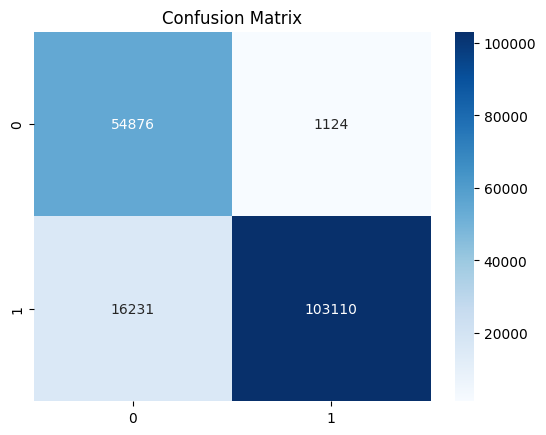

In [22]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Create an SVM classifier with a rbf kernel
#Build the model
model = SVC(kernel="rbf", probability=True)
model.fit(X_train, y_train)

with open('/kaggle/working/svc_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Predict class labels for the test set
y_pred = model.predict(X_test)

# Predict probabilities for the positive class (assuming positive class is 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     56000
           1       0.97      0.90      0.93    119341

    accuracy                           0.91    175341
   macro avg       0.89      0.92      0.90    175341
weighted avg       0.92      0.91      0.91    175341



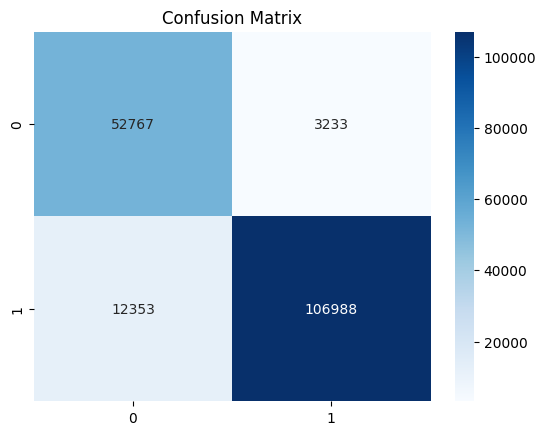

In [24]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()